# CDS: Numerical Methods -- Final Assignment

- See lecture notes and documentation on Brightspace for Python and Jupyter basics. If you are stuck, try to google or get in touch via Discord.

- Solutions must be submitted <font color=red>**individually**</font> via the Jupyter Hub until <font color=red>**Monday, April 4th, 23:59**</font>.

- Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE".

- Remember to document your source codes (docstrings, comments where necessary) and to write it as clear as possible.

- Do not forget to fully annotate all of your plots.

## Submission

1. make sure everything runs as expected
2. **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart)
3. **run all cells** (in the menubar, select Cell$\rightarrow$Run All)
4. Check all outputs (Out[\*]) for errors and **resolve them if necessary**
5. submit your solutions  **in time (before the deadline)**

## Tight-Binding Propagation Method Module

### Tight-Binding Theory

Solid state theory aims to describe crystalline structures defined by periodic arrangements of atomic positions $\vec{R}_i$ with $i= 1 \dots n$. To model the electronic properties of such a structure, we can use the so-called tight-binding method. Here one assumes that the problem for a single atom described by the Hamiltonian $H_{at}(\vec{r})$ has already been solved, so that the atomic wave functions $\phi_m(\vec{r})$ are known. The Hamiltonian of the crystalline structure is then constructed from these atomic Hamiltonians as follows 

\begin{align*}
    H(\vec{r}) = \sum_{i} H_{at}(\vec{r} - \vec{R}_i) + \Delta V(\vec{r}),
\end{align*}

where $\Delta V(\vec{r})$ describes the changes to the atomic potentials due to the periodic arrangement. Solutions to the time-dependent Schrödinger equation $\psi_n(\vec{r})$ can then be approximated by linear combinations of the atomic orbitals, i.e. 

\begin{align*}
    \psi_m(\vec{r}) = \sum_{i} \, c_{i,m} \, \phi_m(\vec{r}-\vec{R}_i). 
\end{align*}

Thus, our task is to find the coefficients $c_{i,m}$, which are the eigenfunctions of the tight-binding Hamiltonian $H_{tb}$. In the basis of the atomic orbitals $H_{tb}$ is an $n \times n$ matrix which describes the "hopping" of an electron from one atomic position to the other. In this description the electrons are assumed to be tightly bound to the atomic positions, hence the name of the approach. In summary, we have reduced our original problem $H(\vec{r})$, described in a continuous space $\vec{r}$, to a strongly discretized problem $H_{tb}$ in the space of lattice coordinates $\vec{R}_i$.

### Propagation Method
	
While this reduction already helps a lot, full diagonalizations of the tight-binding matrix is still not feasible if we need to describe realistic structures with thousands of atoms. For this case we like to have a method which allows us to study the electronic properties, without the need of fully diagonalizing the tight-binding matrix. The tight-biding propagation method allows for exactly this. By analyzing the propagation of an initial electronic state through the crystalline structure we also have access to the full eigenspectrum of $H_{tb}$, without explicit diagonalization.
	
### Your Goal
    
In the following you will setup the tight-binding Hamiltonian for a one-dimensional chain of atoms and numerically study its properties using exact diagonalization. Then you will compare it to the results obtained using the tight-binding propagation method. You will need some of the algorithms which you have implemented in the weekly assignments before. Additionally, you will need to implement a few new algorithms, which we have discussed in the last lecture. In principle there will be no need to use Numpy or Scipy (except for Numpy's array handling and a few other exceptions). However, if you encounter any problems with your own implementations of specific functionalities, you can use the Numpy and Scipy alternatives. Therefore you should be able to perform all of the following tasks in any case.

Let us start by importing the necessary packages.

In [ ]:
# Import packages here ...

# YOUR CODE HERE
raise NotImplementedError()

## Step 1: Crystal Lattice

### Task 1.1 [3 points]

In the following exercises the atomic positions of the 1D crystal lattice will be fixed to $\vec{R}_i = x_i = i a$, with $i = 0 \dots n-1$ and $a$ being the lattice constant.

Write a simple Python function that takes the chain length $n$ as an argument and returns the atomic positions $x_i$. Set $a = 1$ for all the following exercises.

In [ ]:
def atomic_positions(n):
    # YOUR CODE HERE
    raise NotImplementedError()

## Step 2: Atomic Basis Functions

Our atomic basis functions will be Gaussians of the form
$$
\large
\phi(x, \mu, \sigma) = \frac{1}{\pi^{1/4} \sigma^{1/2}} e^{-\frac{1}{2} \left(\frac{x-\mu}{\sigma}\right)^2},
$$
	where $\mu$ is their localization position and $\sigma$ their broadenings. We also choose to have just one orbital per atom so that we can drop the index $m$ from now on. 
	
### Task 2.1 [4 points]
Implement a Python function which calculates $\phi(x, \mu, \sigma)$ for a whole array of arbitrary $x$, centered at given $\mu$ with a given broadening $\sigma$.

Plot all the atomic basis functions for a chain with $n = 10$ atoms, using $\sigma = 0.25$. I.e. plot $\phi(x, x_i, \sigma)$ vs $x$, for all atomic positions $x_i$ in the chain.

In [ ]:
def atomic_basis(x, mu, sigma):
    # YOUR CODE HERE
    raise NotImplementedError()
    
# Yann had result: plot of 10 peaks/gaussians at different centers x integers.

### Task 2.2 [6 points]
Implement a Python function to calculate numerical integrals (using for example the composite trapezoid or Simpson rule). This one should be general enough to calculate integrals $\int_a^b f(x) dx$ for arbitrary functions $f(x)$, as you will need it for other tasks as well.

Implement a simple unit test for your integration function.

In [ ]:
def integrate(yk, x):
    # YOUR CODE HERE
    raise NotImplementedError()

# "Make sure to add all the docstrings and comments as to not lose points."

In [ ]:
def test_integrate():
    # YOUR CODE HERE
    raise NotImplementedError()
    
test_integrate()

### Task 2.3 [2 points]
Use your Python integration function to check the orthogonality of the Gaussian basis functions by verifying the following condition $$\delta_{ij} = \int_{-\infty}^{+\infty} \phi(x, x_i, \sigma) \, \phi(x, x_j, \sigma) \, dx,$$ where $\delta_{ii} \approx 1$ and $\delta_{ij} \approx 0$ for $\sigma = 0.25$.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

# Yann had output:
#delta_00 = 1.00000
#delta_01 = 0.01832
#delta_02 = 0.00000
#delta_34 = 0.01832
# Explanation: next neighbours migth have some overlap. Further away, no overlap at all.

## Step 3: Tight-Binding Hamiltonian

The tight-binding Hamiltonian for our 1D chain should describe the hopping of an electron from all atomic positions to their nearest left and right neighbours (i.e. no long-range hopping). The resulting matrix representation in the basis of the discrete $x_i$ positions is therefore given as a tri-diagonal $n \times n$ matrix of the form

\begin{align}
    \mathbf{H}_{tb} =
    \left( \begin{array}{cccc}
    0 & t & & 0\\
    t & \ddots & \ddots &  \\
      & \ddots & \ddots &  t \\
    0 &  & t & 0
    \end{array}  \right),
\end{align}

where $t = t_{i,i\pm1}$ is the nearest-neighbour hopping matrix element. A hopping matrix element $t_{i,j}$ is a measure for the probability of an electron to hop from site $i$ to site $j$. They are defined as

\begin{align}
    t_{i,j} = \int_{-\infty}^{+\infty} \phi(x, x_i, \sigma) \, \Delta V(x) \, \phi(x, x_j, \sigma) \, dx,
\end{align}

with the potential fixed to

\begin{align}
    \Delta V(x) = \sum_i \frac{-1}{|x - x_i| + 0.001}.
\end{align}

### Task 3.1 [3 points]
Write a Python function to calculate $t_{i,j}$, using $\sigma = 0.25$. The function should have as input the indices $i$ and $j$, and the chain length $n$. Verify that the long-range hoppings $t_{i,i\pm2}$ and $t_{i,i\pm3}$ are negligible compared to $t_{i,i\pm1}$.

Hint: use your integration function from task 2.2

In [ ]:
def hopping(i, j, n):
    # YOUR CODE HERE
    raise NotImplementedError()

# Yann had
# 1) a plot of the peaks as before
# 2) a weird line under it with peaks downward at these x
#    and slowly rising energy values outside the chain
# 3)
# For i = 1 ...
#     t_{i,i-1} = -0.1203
#     t_{i,i+1} = ...

In [ ]:
# Verify that long-range hoppings are negligible here ...

# YOUR CODE HERE
raise NotImplementedError()

### Task 3.2 [3 points]
Implement a diagonalization routine for tri-diagonal matrices which returns all eigenvalues, for example using the $QR$ decomposition (it is fine to use Numpy's $\text{qr()}$). 

Hint: For tri-diagonal matrices with vanishing diagonal elements, the $QR$-decomposition-based diagonalization algorithm gets trapped. To get around this you could, for example, add a diagonal $1$ to your matrix, and later subtract $1$ from each eigenvalue.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

# Yann said we just have to be able to solve tri-diagonal matrix diagonalization, but more general is ok.

### Task 3.3 [3 points]
Implement a unit test for your diagonalization routine.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

### Task 3.4 [4 points]
First, write a function that generates your tight-binding Hamiltonian $\mathbf{H}_{tb}$, for a given chain length $n$. Use $t = t_{i,i\pm1}$, as calculated in task 3.1. You can choose any $i$ near the center of the chain for the calculation of $t$, as the chain is (approximately) periodic.

Second, use your diagonalization routine to calculate all the eigenvalues $E_m$, for a variety of $n=10,20,40,80,100$. Sort the resulting $E_m$ and plot them vs. $m$.

In [ ]:
def TBHamiltonian(n):
    # YOUR CODE HERE
    raise NotImplementedError()

In [ ]:
# Do your plotting here ...

# YOUR CODE HERE
raise NotImplementedError()

# Yann had a plot with a couple of logisticly looking rising lines,
# starting at the same x point, but some higher starting y value,
# ending nonintersection some higher some lower.

### Task 3.5 [3 points]
Implement a function to calculate the so-called density-of-states 

\begin{align*}
    \rho(\omega) = \frac{1}{N} \sum_i \delta(\omega - E_i),
\end{align*}

for a variable energy grid $\omega$. Do this by approximating the $\delta$-distribution with a Gaussian. In detail, you can use your atomic orbital function $\delta(\omega - E_i) \approx \phi(\omega, E_i, \sigma_\rho)$. Calculate the normalization factor $N$ such that $\int \rho(\omega) dw = 1$ is fulfilled.

Your function should take as input the energy grid $\omega$, the eigenenergies $E_i$ and the broadening $\sigma_\rho$.

In [ ]:
def getDOS_ED(w, Ei, sigma):
    # YOUR CODE HERE
    raise NotImplementedError()

### Task 3.6 [3 points]
Use your density-of-states routine to calculate $\rho(\omega)$ for $n=10,20,40,80,100$ for $\sigma_\rho \approx 0.005$. See below for two examples with $t \approx -0.195$ and $n=10$ and $n=100$.

Hint: if your plots look like they are smoothed out, try decreasing $\sigma_\rho$. If they look like there is a lot of noise, try increasing $\sigma_\rho$.

$n = 10$ | $n = 100$
:-: | :-:
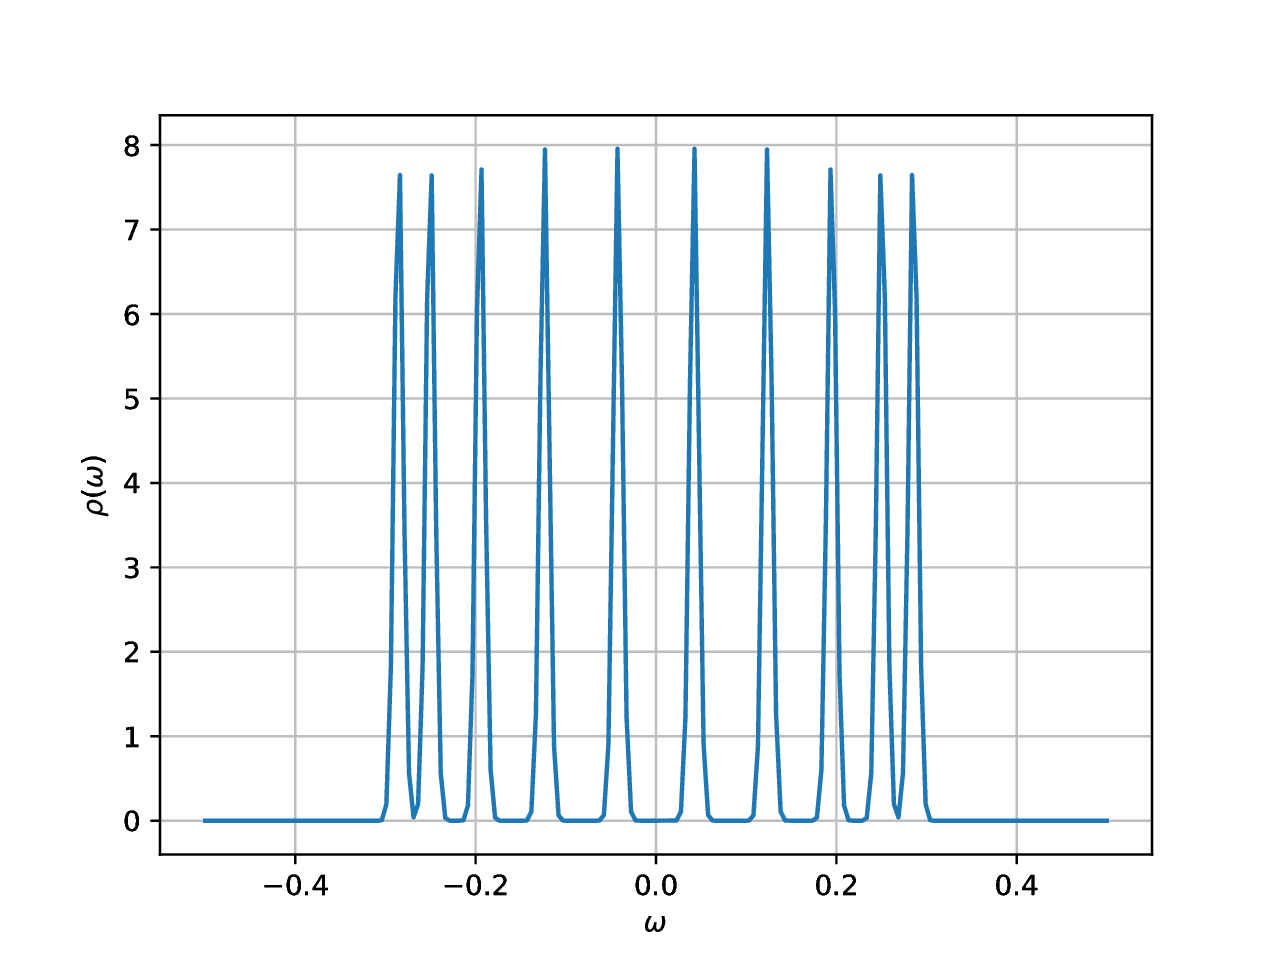 | 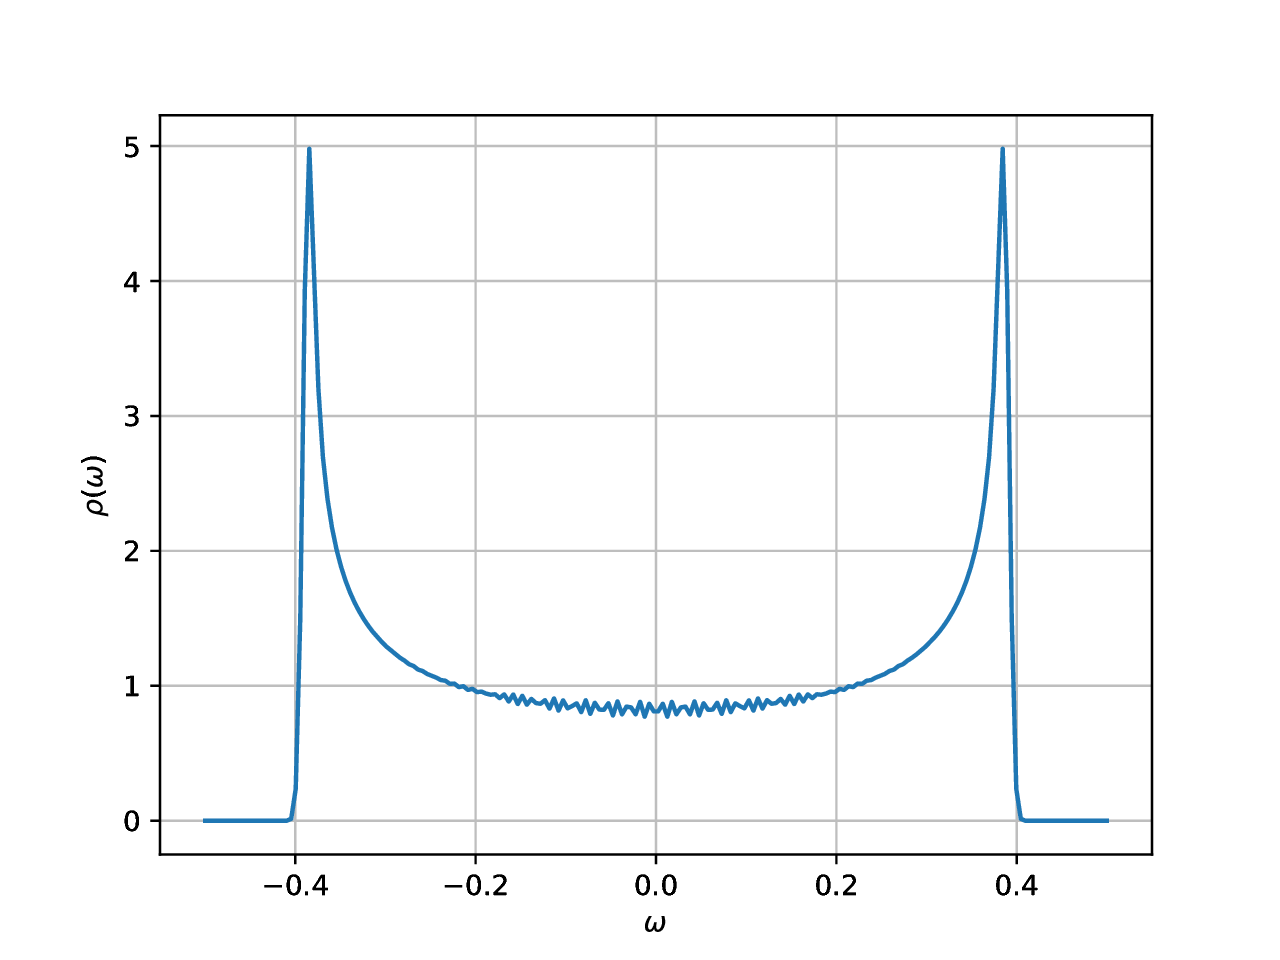

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

## Step 4: Tight-Binding Propagation Method

Now we turn to the time-dependent Schrödinger equation

\begin{align}
    i\hbar\frac{\partial}{\partial t} \psi(x,t) = H \psi(x,t),
\end{align}

which has the formal solution

\begin{align}
    \psi(x,t) = U(t) \psi(x,t=0),
\end{align}

with 

\begin{align}
    U(t) = e^{-i \hbar H t}
\end{align}

being the time-propagation operator. Within the propagation method we can calculate the so-called local density-of-states

\begin{align}
    \rho_{loc}(\omega) = \frac{1}{2\pi} \int_{-\infty}^{+\infty} \, e^{i\omega t} \, f(t) \ dt,
\end{align}

with respect to an (arbitrary) initial state $\psi(x,t=0)$, where

\begin{align}
    f(t) &= \int_{-\infty}^{+\infty} \, \psi^*(x,t) \, \psi(x,t=0) \, dx \\
         &\approx \int_{-\infty}^{+\infty} \sum_i c_i^*(t) \phi(x,x_i,\sigma) \, \sum_j c_j(0) \phi(x,x_j,\sigma) \, dx \notag \\
         &\approx \sum_i c_i^*(t) c_i(0). \notag
\end{align}

Thus, the time propagation of an initial state towards positive *and* negative times followed by a Fourier transform of $f(t)$ yields the local density-of-states. To obtain the full density-of-states we need to average $\rho_{loc}(\omega)$ as follows

\begin{align}
    \rho(\omega) = \lim_{S \to \infty} \frac{1}{S} \sum_p^S \rho^{(p)}_{loc}(\omega)
\end{align}

over a variety of *random* initial states $p$.

### Task 4.1 [3 points]
Implement a function which calculates the exact time-propagation matrix $U(\tau)$ for a small time-step $\tau$ given the Hamiltonian $H$. For simplicity, set $\hbar = 1$ in the following. 

Hint: Use Scipy's $\text{expm()}$ function.

In [ ]:
def getU_exact(tau, H):
    # YOUR CODE HERE
    raise NotImplementedError()

### Task 4.2 [3 points]
Implement a function which performs the step-by-step time propagation given an initial state $\vec{c}(0)$, the matrix $U(\tau)$ and the discretized time grid $t_j$. In other words, your function should calculate 

$$\vec{c}(j+1) = U(\tau) \cdot \vec{c}(j)$$ 

for all $j$ of a given discretized time grid $t_j = j \tau$.

In [ ]:
def timePropagate(U, c0, t):
    # YOUR CODE HERE
    raise NotImplementedError()

### Task 4.3 [4 points]
Use both of the above functions to calculate and animate the time propagation of an initial state

$$\psi(x,t=0) = \phi(x, x_{i=n/2}, \sigma) \leftrightarrow \vec{c}(0) = [c_{i=n/2}(0) = 1, c_{i\neq n/2}(0) = 0]$$

for a $n=100$ chain. Discretize your time grid as $t_j=j\tau$ with $j=0 \dots 200$, and $\tau=1.5$. Use again $a = 1$ and $\sigma=0.25$. 

To plot / animate the time propagation you should plot the real-space wave function $\psi(x,t) \approx \sum_i c_i(t) \phi(x, x_i, \sigma)$.

Hint: use your function from task 3.4 to get the Hamiltonian $H$.

For the animation you can use the following draft:
```python
# use matplotlib's animation package
import matplotlib.pylab as plt
import matplotlib
import matplotlib.animation as animation
# set the animation style to "jshtml" (for the use in Jupyter)
matplotlib.rcParams['animation.html'] = 'jshtml'

# create a figure for the animation
fig = plt.figure()
plt.grid(True)
plt.xlim( ... )     # fix x limits
plt.ylim( ... )     # fix y limits

# Create an empty plot object and prevent its showing (we will fill it each frame)
myPlot, = plt.plot([0], [0])
plt.close()

# This function is called each frame to generate the animation (f is the frame number)
def animate(f):                   
    myPlot.set_data( ... )  # update plot

# Show the animation
frames = np.arange(1, np.size(t))  # t is the time grid here
myAnimation = animation.FuncAnimation(fig, animate, frames, interval = 20)
myAnimation
```

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
# Animate here ...

# YOUR CODE HERE
raise NotImplementedError()

# Yann has an animation about an atomic orbital that starts
# moving to left and right and then bounce back.

### Task 4.4 [3 points]
Implement a function which calculates the Crank-Nicolson time-propagation matrix 

\begin{align*}
    U_{CN}(\tau) = (I - i \tau H / 2)\cdot(I + i \tau H / 2)^{-1}.
\end{align*}

Here, $I$ is the diagonal identity matrix. Use Numpy's $\text{inv()}$ function to invert the needed expression.

In [ ]:
def getU_CN(tau, H):
    # YOUR CODE HERE
    raise NotImplementedError()

# Yann notes that the definition of $U_{CN}(\tau)$ here is a little
# different from what Malte used on the slides. He recommends using
# what is stated here.

### Task 4.5 [5 points]
Implement a function which calculates the time-propagation matrix using the Trotter-Suzuki decomposition 

\begin{align*}
    U_{TZ}(\tau) = e^{-i\tau H_1} \cdot e^{-i \tau H_2}.
\end{align*}

In this approach you choose a decomposition of the tight-binding Hamiltonian $H = H_1 + H_2$, which allows you to analytically diagonalize $H_1$ and $H_2$ (see last lecture). From this analytic diagonalization you will be able to calculate the matrix exponentials $e^{-i\tau H_1}$ and $e^{-i \tau H_2}$.

Write your definition of the 2x2 blocks in $e^{-i\tau H_1}$ and $e^{-i \tau H_2}$ in the Markdown cell below. (Double click on "YOUR ANSWER HERE" to open the cell, and ctrl+enter to compile.) 

YOUR ANSWER HERE

In [ ]:
def getU_TZ(tau, H):
    # YOUR CODE HERE
    raise NotImplementedError()

# Yann mentions again that this is slightly different wrong what
# is in the slides/lecture.

### Task 4.6 [3 points]
In your implementation of $U_{TZ}(\tau)$ you analytically evaluate the matrix exponentials $e^{-i\tau H_1}$ and $e^{-i \tau H_2}$. Test your implementation by comparing your results for these matrix exponentials to those obtained using Scipy's $\text{expm()}$ function.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

# Yann printed
#Biggest differences of U1 with Scipy:
#Real: 1e-16 
#Imag: 2.77e-17
#    
# and difference with U_exact in the order of 1e-1 or 1e-2.

### Task 4.7 [6 points]
In the next task you will need a Fourier transform to calculate the local density-of-states. Therefore you will need to implement a function that returns the Fourier transform $f(\omega)$ of a given function $f(t)$ defined on a time grid $t$, for a given energy grid $\omega$. I.e. it should calculate:

\begin{align}
    f(\omega) = \frac{1}{2\pi} \int_{-\infty}^{+\infty} \, e^{i\omega t} \, f(t) \ dt.
\end{align}

Hint: use your integration function from task 2.2.

Then implement a unit test for your function.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
# Implement your unit test here ...

# YOUR CODE HERE
raise NotImplementedError()

### Task 4.8 [3 points]
Calculate the local density-of-states $\rho_{loc}(\omega)$ from the Fourier transform of $f(t)$ using all three time propagation methods: $U(\tau)$, $U_{CN}(\tau)$ and $U_{TZ}(\tau)$.

Start from $\psi(x,t=0) = \phi(x, x_{i=0}, \sigma)$ and $\psi(x,t=0) = \phi(x, x_{i=n/2}, \sigma)$, using a $n=100$ chain. Discretize your integration time grid as $t_j=j\tau$, with $j=-150 \dots 150$ and $\tau=1.5$. Use again $a = 1$ and $\sigma=0.25$.

Be careful: for the Fourier transform you will need positive *and* negative time steps! Thus you will need to do two time propagations: one using $U(\tau)$ towards positive times and one using $U(-\tau)$ towards negative times, both starting from $\psi(x,t=0)$.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
# Do your own testing here ...

# YOUR CODE HERE
raise NotImplementedError()

# Yann had a plot for Tau = 1.5
# DOS: looking like a hill ("like a dome with a peak around zero energy 0")
# for CN, TS and the exact one
# a plot of f(t)
# a plot of local DOS
# in the title he mentiones the inital values.

### Task 4.9 [6 points]
Use the Trotter-Suzuki decomposition to calculate the full density-of-states by averaging over about $100$ local density-of-states you obtained from the time propagation of $100$ random initial states $\vec{c}(0)$. To this end, you will need to make sure that each $\vec{c}(0)$ is (a) normalized and (b) can have positive *and* negative elements. 

Compare this approximation to the total density-of-states to the exact one from task 3.6, which you obtained directly from the eigenvalues.

Hint: don't expect the results to be the exact same. Check for the location of the peaks, and whether they have a similar order of magnitude.

Hint: if you did not get the Trotter-Suzuki decomposition to work, you can instead use the exact or the Crank-Nicolson time-propagation matrix.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

# Yann says the initial states do need to be negative, too.

In [ ]:
# Do your plotting here ...

# YOUR CODE HERE
raise NotImplementedError()

# Yann plotted the exact diagonalisation and the TS propagation results
# he had two plots, one peaky, one with peaks on the edges (looking a little
# like my 1f/2f results in my bachelor internship hmmpfff)